# Introduction

## Notebook Objectives
* **Spin up a Dask cluster.** A cluster consists of a scheduler (that manages flow of work) and workers (that perform actual computations).
* **Introduction to Dask Delayed API**, an interface for parallelizing Python operations.

## Spin up a Dask Cluster

Spin up a new cluster with the following code. You can specify the number of workers with `n_workers`.

In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

client

Client Scheduler: tcp://127.0.0.1:52022 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 17.18 GB


Here the 4 workers have 12 cores overall and 17GB of memory to use.

The Daskboard link takes you to Dask's diagnostic dashboard that contains real-time information about the state of your cluster.

Always remember to close the session with:

In [2]:
client.close()

## Introduction to **Dask Delayed API**

Dask Delayed is a low-level collection that can be used to parallelize most python operations.

For example, consider the following functions for incrementing a number and adding two numbers.

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time

a = 10
b = 10

a = inc(a)
b = inc(b)

c = add(a, b)
c

CPU times: user 1.24 ms, sys: 1.12 ms, total: 2.36 ms
Wall time: 3.01 s


22

This can be parallelized using Dask Delayed.

In [8]:
from dask import delayed

In [9]:
%%time

x = delayed(inc)(10)
y = delayed(inc)(10)

z = delayed(add)(x, y)
z

CPU times: user 514 µs, sys: 325 µs, total: 839 µs
Wall time: 623 µs


Delayed('add-d449107f-7ecc-4ec9-a4bd-94cd4c0b47f5')

### Lazy evaluation

The above code does not produce any output because Dask's Delayed API that evaluates _lazily_. Lazy evaluation refers to the paradigm of generating the entire task graph but evaluating it only when necessary.

To evaluate and get an output, you can use the `compute()` method.

In [10]:
z.compute()

22

### Task Graph

As mentioned earlier, a task graph determines how the computation must be executed in parallel. To view the task graph, you can call `visualize()` on interfaces that are backed by the Delayed API.

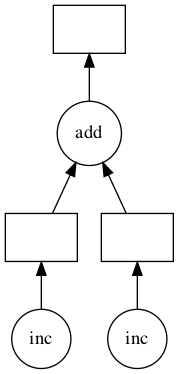

In [11]:
z.visualize()

We will take a deeper look at the Delayed API in the next course.